<a href="https://www.kaggle.com/adigli/bank-churners-eda?scriptVersionId=85437814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory data anaysis of credit card customer churn

The dataset can be found on [here](https://www.kaggle.com/sakshigoyal7/credit-card-customers) on kaggle.com.

## Intoduction

In this notebook contains a data analysis on the credit card customers data to draw infrences on the churning customers behaviors before they cancel thier credit cards.

## What is churn and why does it matter? 
Customer churn means that the customer is leaving or stoping using the product or service of the company. Customers leaving the product or service provided by companies is commun do to a multitude of factors. For the bank, understanding why the custermers are churning is very important as the competition of new fintechs is growing. A growing churn rate can mean a couple of things:

- The economic implication of a growing churn rate will result in lowering the customer lifetime value, witch may lead to lower revenue and profit margins. It may also lead to a lower market share due to loss of customers to compatitors. One other economic aspect related to churn is the term customer accuazision cost, with is the avrege cost for accuaring a new customer. The norm is that its more expensive to accuire a new customer then trying to keed an existing customer. 
- If customers are leaving it may also indicate that some things are not working with the product or service. Those type of signals in the organisation are important to understand and aress as soon as possible to keep the current customers and gain new ones. 

This is why it's one of the most important metrics to understand and monitor for companies.




## Problem Statement
 To understand churn it would be benefitial to set some relevant metrics when mesuring it. One central metic to mesure is time, ie. how long has the client used the products/services? The relevant metrics for mesuring churn may vary depending on the industry and type of customer interaction that is important for the company. For most companies it may be revenue, conversion rates or some other similar metric, but for some, like facebook / instagram, it may be engagement and time spend on the platform. For getting a clear picture of the right nr of the customers leaving the company it requires a set of considerations and assumtions that may be specific to the sector or company. This includes a time perspective, ie. how long time should pass before we consider the customer as no longer a customer, or those it require other mesasures as termination of contract, not renewing a service contract or something similar. It's important the understand the metrics with witch we mesure customer churn. On other aspect worth considering is that new costomers are usally accurired during the same period, so the standard formula for customer churn (attrited customers / all existing customer) may not take that fast in consideration. 


## The objectives 

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

> **The objective of this analysis is to understand what customers are at risk for churning and visualize that in a clear and consise way.**


**The scope:**

**The scope is to do an data exploratory analysis to understand what circumstances effecting the churn rate. If possible we will explore proposals for improving the churnrate or what data and questions would be relevant to explore further to lower the churnrate.**


_We are going to cover the following steps:_
- Download the dataset
- Import/install libraries
- Import the data into a pandas dataframe
- Get to know more about the dataset
- Clean the dataset 
- Do an exploratory data analysis
- What insigts can we gain from the analysis? 
- What is the impact of the insights? Action items to explore. 
- Further exploration and questions

References


Let's get started.

## The dataset
Looking at the data we see that the dataset contains both numerc and cathegorical datatypes. The data is for each customer with a client nr (CLIENTNUM), attrition identifier, demographic data and product data. Let's see what are the types of variables in our dataset:

- Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0

**Demographic variable**: 
- age             : - Customer's Age in Years
- gender          : - M=Male, F=Female
- dependent count : - Number of dependents
- education level : - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- marital status  : - Married, Single, Divorced, Unknown
- income category : - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

**Product and client engagement variables** 
- Card_Category  : - Type of Card (Blue, Silver, Gold, Platinum) 
- Months_on_book - Period of relationship with bank

The following variables are not explaind further in the dataset, so this are my assumtions (to be verified):  
- Total_Relationship_Count - 
- Months_Inactive_12_mon - Inactive months for the past year
- Contacts_Count_12_mon - Contact coufor the past year
- Credit_Limit - Credit limit 
- Total_Revolving_Bal - The total revolving balance 
- Avg_Open_To_Buy - The avrage amount availabe for buying
- Total_Amt_Chng_Q4_Q1 - Total amount chage for the Q4 - Q1 period
- Total_Trans_Amt - Total Transaction amount 
- Total_Trans_Ct - Total transaction ct(?)
 -Total_Ct_Chng_Q4_Q1 - Total for the Q4 - Q1 period
- Avg_Utilization_Ratio - The average ration the card is used (not knowd how that is calculated) 
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 - unknown, to be deleted
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 - unknown, to be deleted
   
   
_resources:_
- [Variable types and examples](https://www.statsandr.com/blog/variable-types-and-examples/)
- [What is the difference between ordinal, interval and ratio variables? Why should I care?](https://www.graphpad.com/support/faq/what-is-the-difference-between-ordinal-interval-and-ratio-variables-why-should-i-care/)



### Importing the libraries

First lets import the libraries we will be using. Today we will use pandas for the exploratory data analysis. For visualizing the data we will be using matplotlib, seaborn and plotly.

Today we will use the [pandas](https://pandas.pydata.org/) and [numpy](https://numpy.org/) libraries for loading and cleaning the dataset. 


In [1]:
# For importing and analysing the data
#import opendatasets as od #used for downloading the dataset from kaggle
import pandas as pd #used for the main exploratory data analysis and working with the dataset
import numpy as np #used for numerical and statistical analysis


### Downloading the data

In [2]:
'''Opendatasets is great for downloading dataset from kaggle, when you run the notebook on other platforms line binder, colag or on your own computer. It not needed when you run the notebook on kaggle.com
Remove the # and run the cell if the you get an error message.'''

#!pip install opendatasets -q 


'Opendatasets is great for downloading dataset from kaggle, when you run the notebook on other platforms line binder, colag or on your own computer. It not needed when you run the notebook on kaggle.com\nRemove the # and run the cell if the you get an error message.'

In [3]:
#dataset_url = 'https://www.kaggle.com/sakshigoyal7/credit-card-customers'
#od.download(dataset_url)

### Importing the data into a pandas dataframe

In [4]:
# First, lets import the data into a dataframe by reding the csv file we downloaded
credit_data = pd.read_csv('../input/credit-card-customers/BankChurners.csv')


#Second, lets make a copy of the dataframe (df) to use for the initial exploration of the data
df = credit_data.copy()

In [5]:
# Lets look at the shape of the dataset

print('Data has {} samples or rows and {} features or columns.'.format(df.shape[0], df.shape[1]))

Data has 10127 samples or rows and 23 features or columns.


**Now lets see the first 10 rows of the dataset:**

In [6]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [7]:
list(df.columns)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

At a quick glase we can allready see that the second columns, `Attrition_Flag` is the one feature that shows us the customers that left, and as such is proving a way to fint the churned customer. A second quick observation is that the colums `Marital_Status` has some `Unknows`values. Will will explore if that feature may have some relevans during the exploratory data analysis. 

Lets get a bit more aquinted with the dataset the exploring more info about it with the following commands: `df.info()` and `df.describe()`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

By the display we see the columns and the count of values for each column. We also see there is no `null` and `N/A`values in any of the collumns. It may still be some values that are unknown or wrong but those we will need to find in some other way. The Object type features tend to be ´str´cathegorical and the int64 and float64 are numerica columns representing values. 

Now lets see what columns contain numerical values. We can display them by this command:

In [9]:
df.select_dtypes(include=np.number).columns.tolist()

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

While looking at the numerical columns we can get the most common statistical data just by using the `df.describe()` command. 

The display shows the `count` `min`, `max`, `std` and `mean` and the `median`along with the lower and upper quartiles. With this we can get an excellent view into the range of the dataset. By knowing the percentile points (25th, 50th, and 75th) aswell as the `min`and `max`we can find outliers and [skewness](https://en.wikipedia.org/wiki/Skewness) of the distribution of the data for each column. 

By looking at the columns we can see that 

In [10]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


**Categorical features** 

The target feature is `Attrition_Flag`. The `Gender`, `Marital_Status`, `Card_Category` are nominal categorial values while the ordinal categorial values are `Education_Level` and `Income_Category.

In [11]:
df.describe(include=[object])  

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


Looking at the description of the cathegorical features we see the top count for each column and the count of unique values in each column. What stands out is that to me is the income cathegory, beeing less then $40K and that the majority of the cards issued are `Blue`. This might be useful to think about moving forward. 

### Data cleaning


Now lets take a look at what columns are of most intresting and what columns we can remove.


**Remove uncessary columns**

We got the information from the dataset source that the last two columns where to be deleted. 

In [12]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)

**Rename columns**

Now lets see if we can rename some colums to make it short and easier to understand.

In [13]:
df.rename(columns = {'CLIENTNUM':'Client_nr', 'Attrition_Flag': 'Status','Customer_Age': 'Age', 'Education_Level' : 'Education'}, inplace = True)
df.head()

,Client_nr,Status,Age,Gender,Dependent_count,Education,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Explaratory data analysis


**By looking at the data we can start to form some questions to inform as on a hypothesis about the most impactful features affecting churnrate.
Lets explore the data and provid insightful analysis by trying to answering some relevant questions:**

- [ ] Does a lower credit card utilization ratio indicate an incresed churning rate?
- [ ] Does the credit card utilization ratio lower in churning customers? 
- [ ] How does the total transaction amount and frequency impact the churnrate?
- [ ] How does the amount of months on book (the time the customer has had a relationsship with the bank) affect the churn risk? 
- [ ] Does the credit limit impact churn rate?

- [ ] What is the influence of the income category on people with a cetrain martial status for leaving the service?
- [ ] What card category customers needs most attention from the service providers?
- [ ] What demographic variables are most impactful predicters of a customer churning?
- [ ] What are the significant diffrenceses between the `Attrited Customer` vs `Existing Customer` in terms of the demographic features in the dataset?

One hypothesis is that the customers behavior prior to them leving the service should be a good indicater of them leaving. The variables that may show that could be those that show how often and how much they are using the service. If the customers a decresing their use of the credit card, this could indicate they got another card that they are using, from a competitor. 

## Visualizing the data

Visualizing data is an essential part of data analysis and machine learning. We'll use Python libraries Matplotlib and Seaborn to learn and apply some popular data visualization techniques. 

To begin, let's install and import the libraries. We'll use the matplotlib.pyplot module for basic plots like line & bar charts. It is often imported with the alias plt. We'll use the seaborn module for more advanced plots. It is commonly imported with the alias sns. We will also use plotly for some charts.

**Importing libraries**
- [Matplotlib](https://matplotlib.org/): Plotting and visualization library for Python. We'll use the pyplot module from matplotlib. As convention, it is often imported as plt.
- [Seaborn](https://seaborn.pydata.org/): An easy-to-use visualizetion library that builds on top of Matplotlib and lets you create beautiful charts with just a few lines of code.


In [14]:
#!pip install matplotlib seaborn --upgrade --quiet

In [15]:
# Lets import the libraries we will be using in the analysis 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [16]:
# Set the global plotting parameters
sns.set_style('whitegrid') #("darkgrid")
#matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now lets explore the data about customers. First we will explore the features for the customers in general, mainly cathegorical data, for both the existing and attrited customers. 
Aftar that we will explore the bank data about the two custemer segments of interest. 

We can start with finding out how many have left and how many are still existing customers:

- **How many existing custermers and attrited customers do we have? How many % of the total customers attrited?**

Status,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848
% row,0.160660,0.839340


<AxesSubplot:xlabel='Status', ylabel='Gender'>

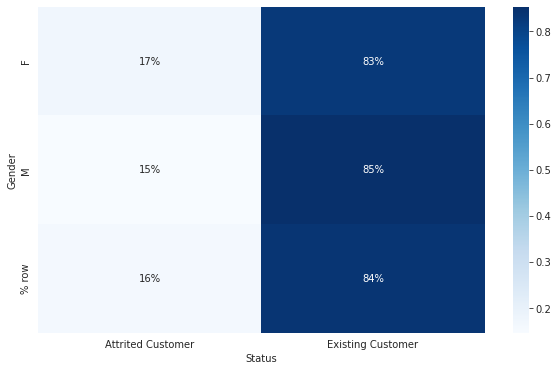

In [17]:
gender_matrix = pd.crosstab(df['Gender'], df['Status'], 
            margins = True, 
            margins_name = "% row", 
            normalize='index')
display(gender_matrix)
sns.heatmap(gender_matrix, annot=True, fmt='.0%', cmap='Blues')

In [18]:
df.columns

Index(['Client_nr', 'Status', 'Age', 'Gender', 'Dependent_count', 'Education',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Status,Attrited Customer,Existing Customer,% all
Card_Category,,,
Blue,0.149995,0.781772,0.931767
Gold,0.002074,0.009381,0.011455
Platinum,0.000494,0.001481,0.001975
Silver,0.008097,0.046707,0.054804
% all,0.160660,0.839340,1.000000


<AxesSubplot:xlabel='Status', ylabel='Card_Category'>

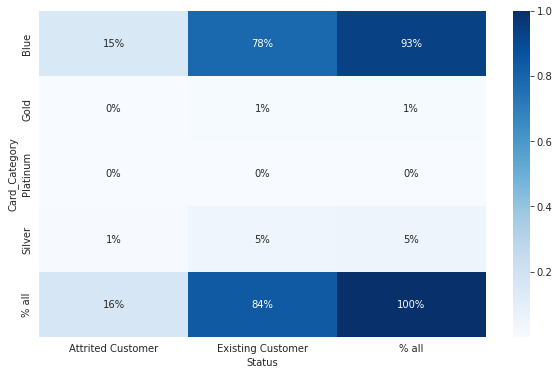

In [19]:
card_matrix = pd.crosstab(df['Card_Category'],df['Status'],
            margins = True,  
            margins_name = "% all", 
            normalize='all')
display(card_matrix)
sns.heatmap(card_matrix, annot=True, fmt='.0%', cmap='Blues')

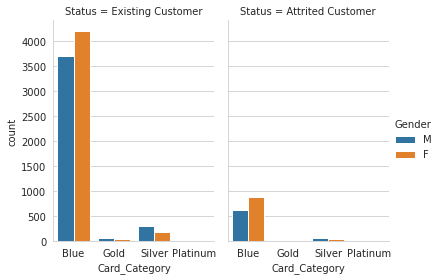

In [20]:
sns.catplot(x="Card_Category", hue="Gender", col="Status",
                data=df, kind="count",
                height=4, aspect=.7);

The majority of the customers that churned are using a `Blue` card.

Status,Attrited Customer,Existing Customer,% all
Income_Category,,,
$120K +,0.012442,0.059346,0.071788
$40K - $60K,0.026760,0.149995,0.176755
$60K - $80K,0.018663,0.119779,0.138442
$80K - $120K,0.023897,0.127678,0.151575
Less than $40K,0.060433,0.291202,0.351634
Unknown,0.018465,0.091340,0.109805
% all,0.160660,0.839340,1.000000


<AxesSubplot:xlabel='Status', ylabel='Income_Category'>

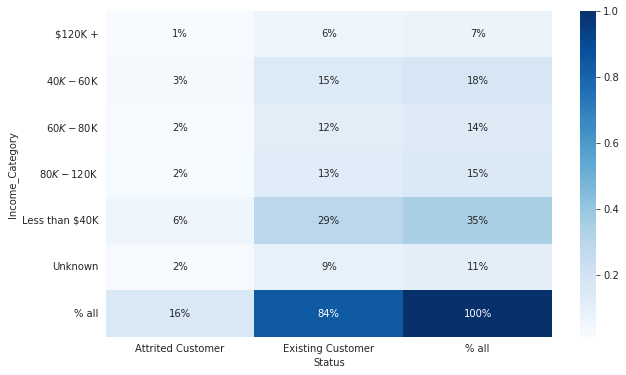

In [21]:
income_matrix = pd.crosstab(df['Income_Category'],df['Status'],
            margins = True,  
            margins_name = "% all", 
            normalize='all')
display(income_matrix)
sns.heatmap(income_matrix, annot=True, fmt='.0%', cmap='Blues')

In [22]:
 pd.crosstab(df['Education'], df['Status'], margins = True, margins_name = "Total")

Status,Attrited Customer,Existing Customer,Total
Education,,,
College,154,859,1013
Doctorate,95,356,451
Graduate,487,2641,3128
High School,306,1707,2013
Post-Graduate,92,424,516
Uneducated,237,1250,1487
Unknown,256,1263,1519
Total,1627,8500,10127


In [23]:
df['Education'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' 

Graduate         30.9%
High School      19.9%
Unknown          15.0%
Uneducated       14.7%
College          10.0%
Post-Graduate     5.1%
Doctorate         4.5%
Name: Education, dtype: object

In [24]:
#Now lets make two sets of data for the existing and the attrited customers respectivly so its easyer to compare the two segments

#Existing Customer
ec = df[df['Status'] == "Existing Customer"] 
#Attrited Customer
ac = df[df['Status'] == "Attrited Customer"]


(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <BarContainer object of 10 artists>)

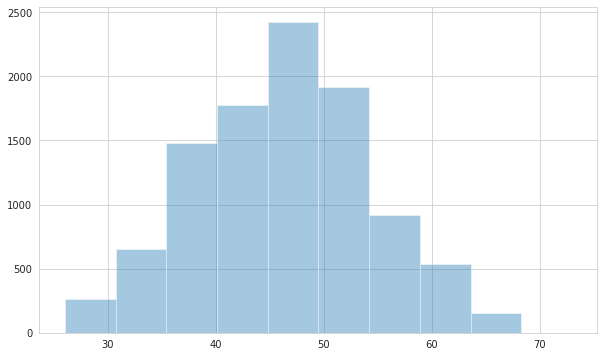

In [25]:
plt.hist(df['Age'], alpha=0.4)
#.mul(100).round(1).astype(str) + '%' 

(array([2.330e+02, 5.640e+02, 1.258e+03, 1.471e+03, 2.021e+03, 1.605e+03,
        7.700e+02, 4.400e+02, 1.360e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <BarContainer object of 10 artists>)

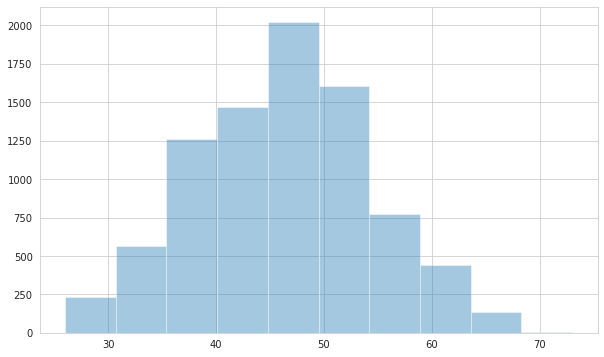

In [26]:
plt.hist(ec['Age'], alpha=0.4)

# Distributions

Now lets look at the distribution of the numerical features:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>],
       [<AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>],
       [<AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>],
       [<AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

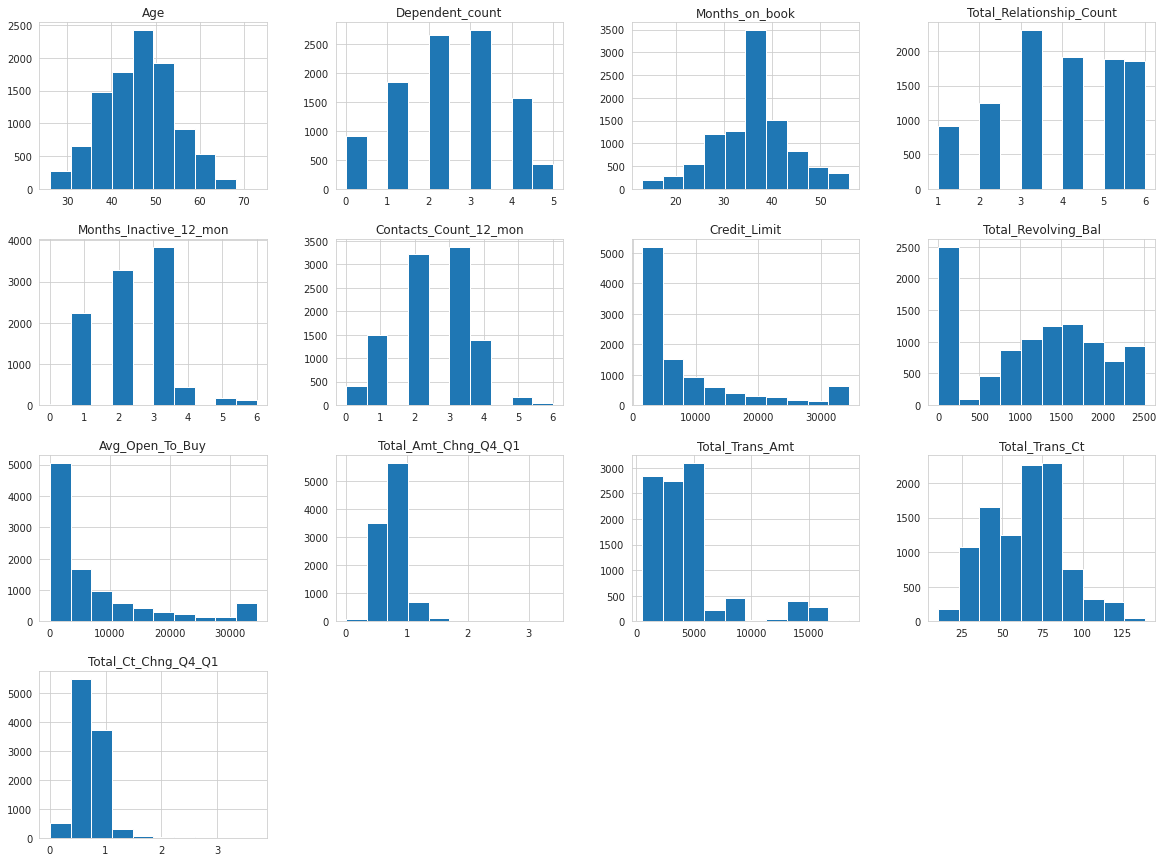

In [27]:
df.iloc[::,1:20].hist(figsize=(20,15))

In [28]:
#sns.relplot(x="Status", y="Income_Category", hue="Credit_Limit", size="Credit_Limit",
          #  sizes=(60, 500), alpha=.5, #palette="muted",
          #  height=6, data=df)

**Now lets look at some of features regarding the customers behavior with the service:**

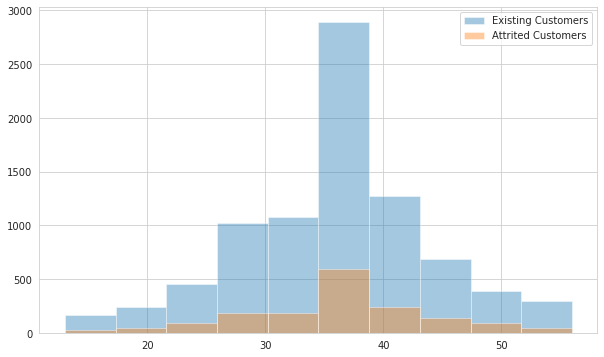

In [29]:
plt.hist(ec.Months_on_book, alpha=0.4); #bins=2);
plt.hist(ac.Months_on_book, alpha=0.4); #bins=2);
plt.legend(['Existing Customers', 'Attrited Customers']);

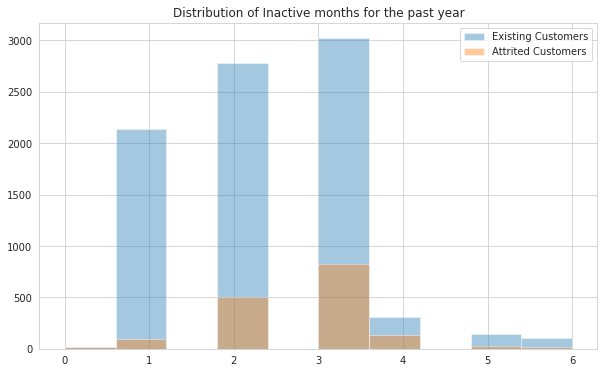

In [30]:
plt.title('Distribution of Inactive months for the past year')
plt.hist(ec.Months_Inactive_12_mon, alpha=0.4); #bins=2);
plt.hist(ac.Months_Inactive_12_mon, alpha=0.4); #bins=2);
plt.legend(['Existing Customers', 'Attrited Customers']);

**Now lets look at the Contract count for the past 12 months**

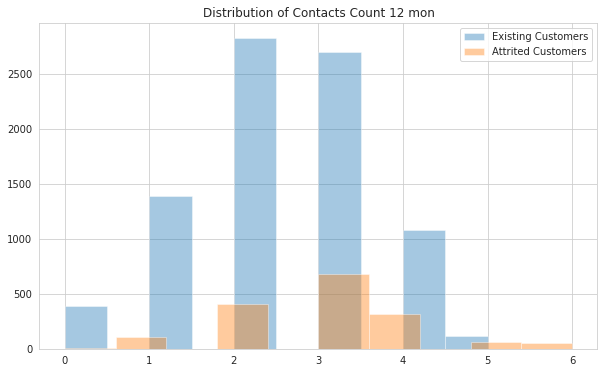

In [31]:
plt.title('Distribution of Contacts Count 12 mon')

plt.hist(ec.Contacts_Count_12_mon, alpha=0.4); #bins=2);
plt.hist(ac.Contacts_Count_12_mon, alpha=0.4); #bins=2);

plt.legend(['Existing Customers', 'Attrited Customers']);

Looking at the months of inactivity durring the last 12 month.

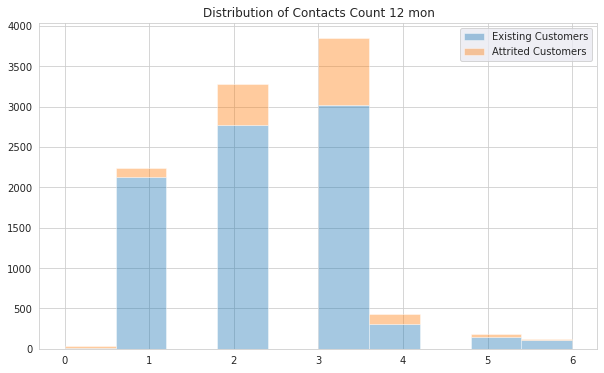

In [32]:
plt.title('Distribution of Contacts Count 12 mon')
sns.set_style("darkgrid")
plt.hist([#ec.Months_on_book,
          #ac.Months_on_book,
          ec.Months_Inactive_12_mon,
          ac.Months_Inactive_12_mon,
          #ec.Contacts_Count_12_mon, 
          #ac.Contacts_Count_12_mon,
          ],
    alpha=0.4,
         #bins=np.arange(2, 5, 0.25), 
    stacked=True);

plt.legend(['Existing Customers', 'Attrited Customers']);

<AxesSubplot:title={'center':'No. of months on book'}, xlabel='Months_on_book', ylabel='Status'>

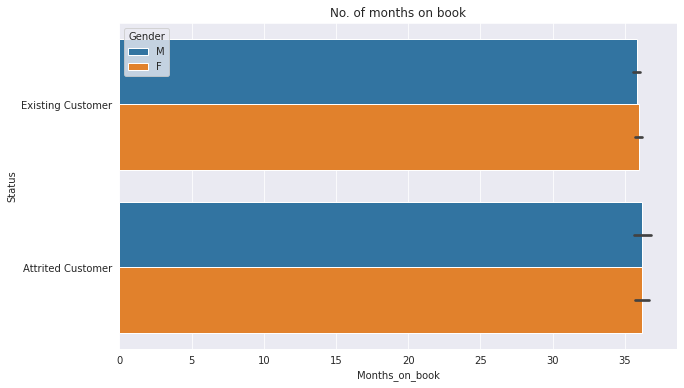

In [33]:
plt.title("No. of months on book")
sns.barplot(x='Months_on_book', y='Status', hue="Gender", data=df)#alpha =0.4);

In [34]:
list(df.Income_Category.unique())

['$60K - $80K',
 'Less than $40K',
 '$80K - $120K',
 '$40K - $60K',
 '$120K +',
 'Unknown']

In [35]:
df.columns

Index(['Client_nr', 'Status', 'Age', 'Gender', 'Dependent_count', 'Education',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [36]:
 pd.crosstab( df['Income_Category'], df['Status'], margins = True, margins_name = "Total")

Status,Attrited Customer,Existing Customer,Total
Income_Category,,,
$120K +,126,601,727
$40K - $60K,271,1519,1790
$60K - $80K,189,1213,1402
$80K - $120K,242,1293,1535
Less than $40K,612,2949,3561
Unknown,187,925,1112
Total,1627,8500,10127


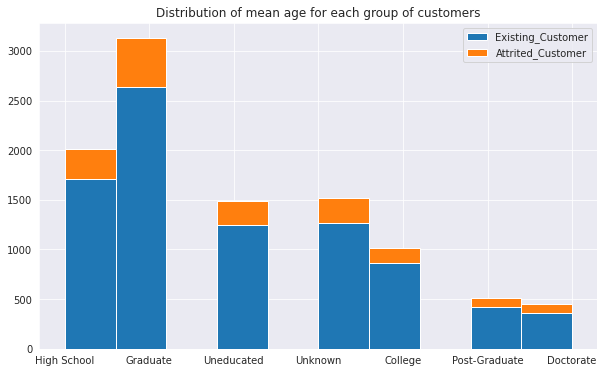

In [37]:
plt.title('Distribution of mean age for each group of customers')


plt.hist([ec.Education, ac.Education], 
         #bins=7, 
         stacked=True);
plt.legend(['Existing_Customer','Attrited_Customer']);

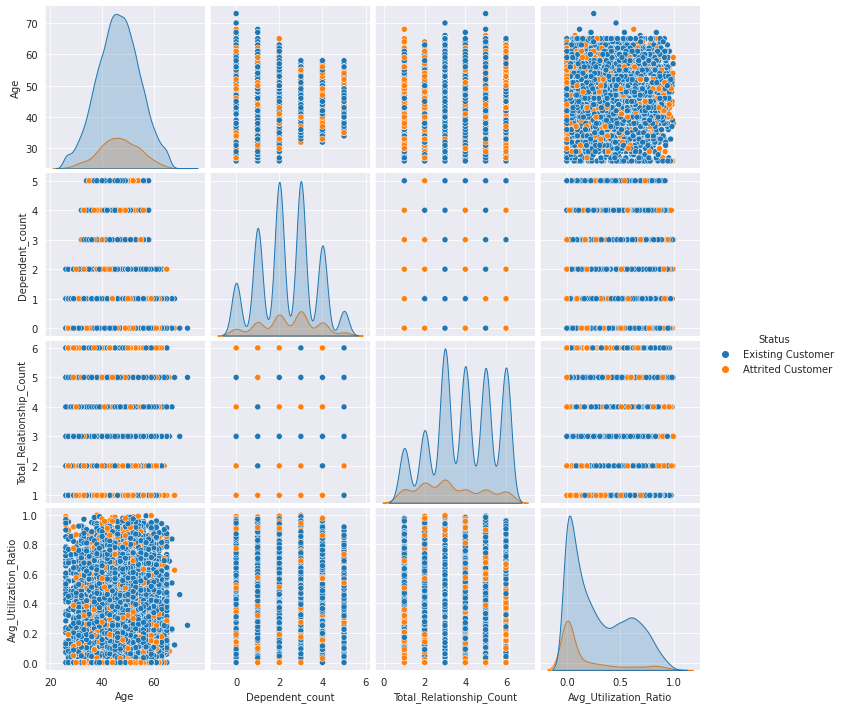

In [38]:
df_customers = df[['Status','Age', 'Gender', 'Dependent_count', 'Education','Marital_Status', 'Income_Category','Total_Relationship_Count','Avg_Utilization_Ratio']]
sns.pairplot(df_customers, hue="Status")

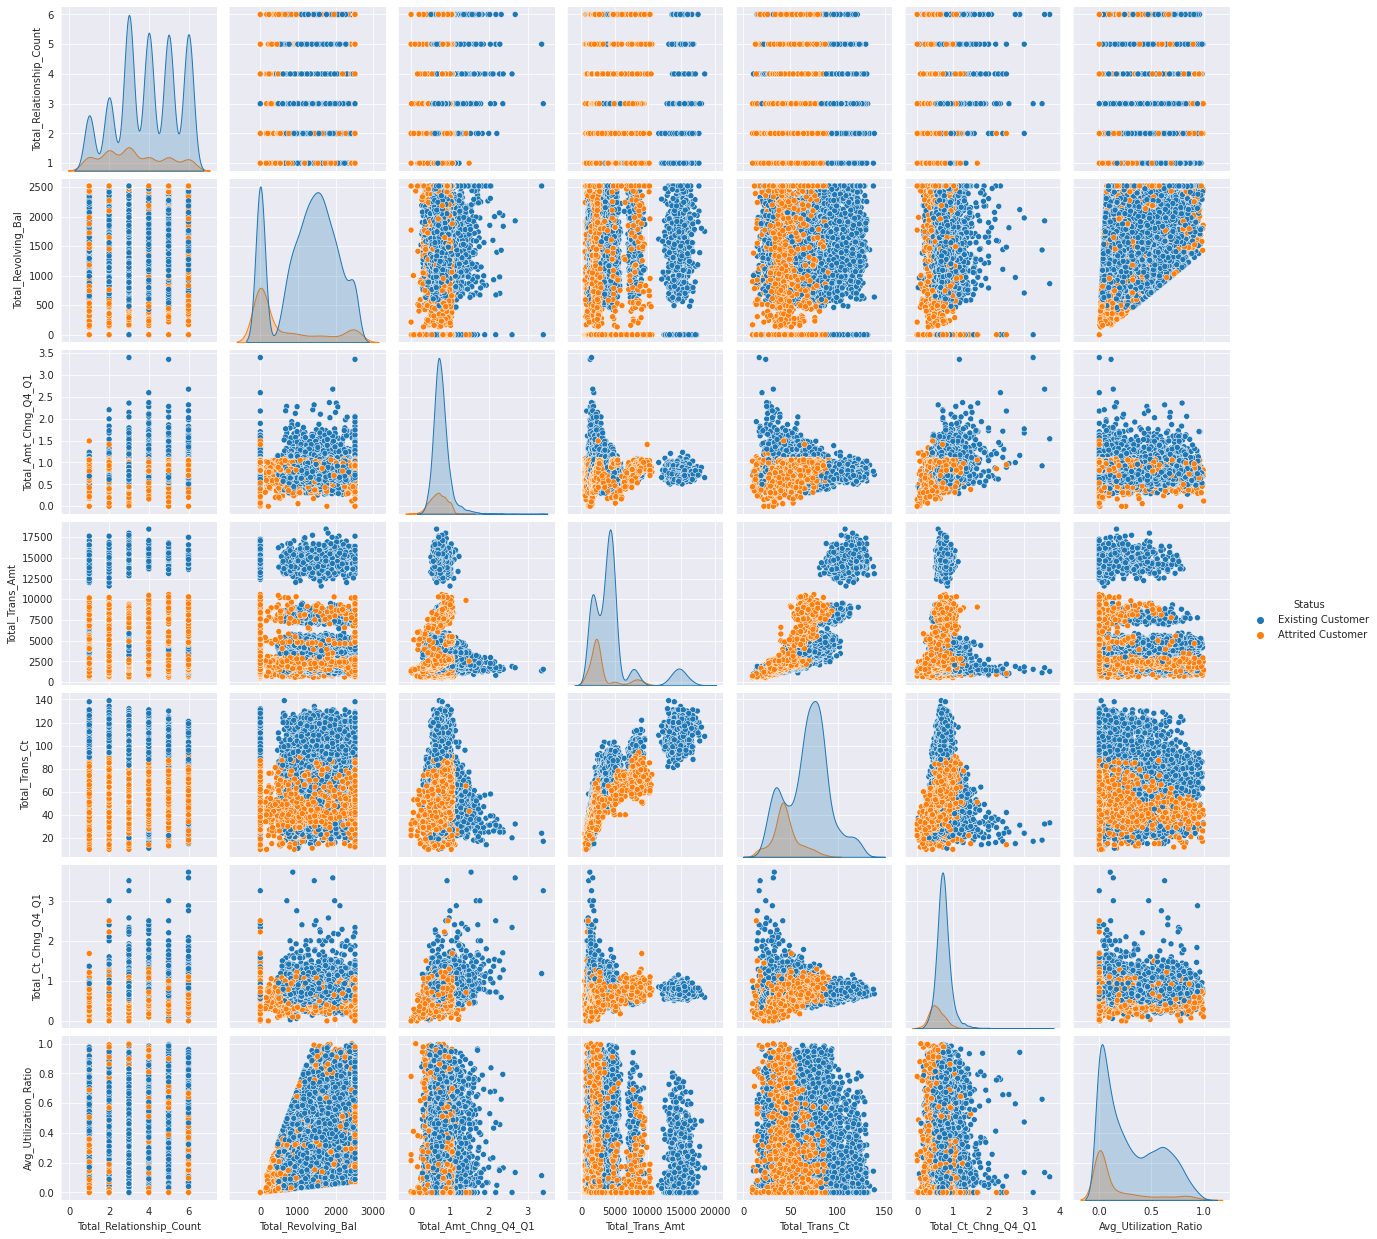

In [39]:
df_totals = df[['Status','Total_Relationship_Count','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
sns.pairplot(df_totals, hue="Status")

# Conslusions 

With regards to the fact that the conclusions would need to be enriched with some domein specific knowledge, we can preliminery conslude that among the most impactful variables for detecting customers at risk for churning is how often they use their card, the amount of 

In that regard we would need to look depper at the varialbes: 
- `Total_Trans_Amt` - The more the customers use the card, the less chans it is they will churn.
- `Total_Trans_Ct` - 
- `Total_Amt_Chng_Q4_Q1` -
- `Months_on_book` is also important at is might indicate that the longer at custermer has been with the band, the lower the risk of churning. 

In [40]:
df_corr = df[['Status', 'Months_on_book', 'Months_Inactive_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']] 
df_corr.corr()

,Months_on_book,Months_Inactive_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
Months_on_book,1.000000,0.074164,0.008623,-0.048959,-0.038591,-0.049819,-0.014072
Months_Inactive_12_mon,0.074164,1.000000,-0.042210,-0.032247,-0.036982,-0.042787,-0.038989
Total_Revolving_Bal,0.008623,-0.042210,1.000000,0.058174,0.064370,0.056060,0.089861
Total_Amt_Chng_Q4_Q1,-0.048959,-0.032247,0.058174,1.000000,0.039678,0.005469,0.384189
Total_Trans_Amt,-0.038591,-0.036982,0.064370,0.039678,1.000000,0.807192,0.085581
Total_Trans_Ct,-0.049819,-0.042787,0.056060,0.005469,0.807192,1.000000,0.112324
Total_Ct_Chng_Q4_Q1,-0.014072,-0.038989,0.089861,0.384189,0.085581,0.112324,1.000000


<AxesSubplot:>

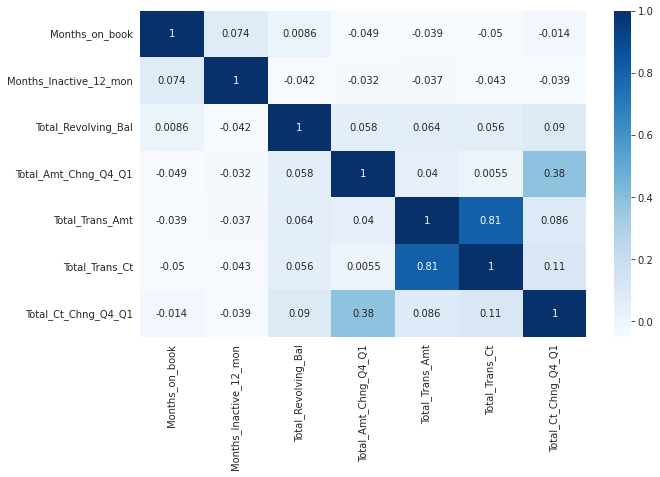

In [41]:
sns.heatmap(df_corr.corr(), cmap="Blues", annot=True)

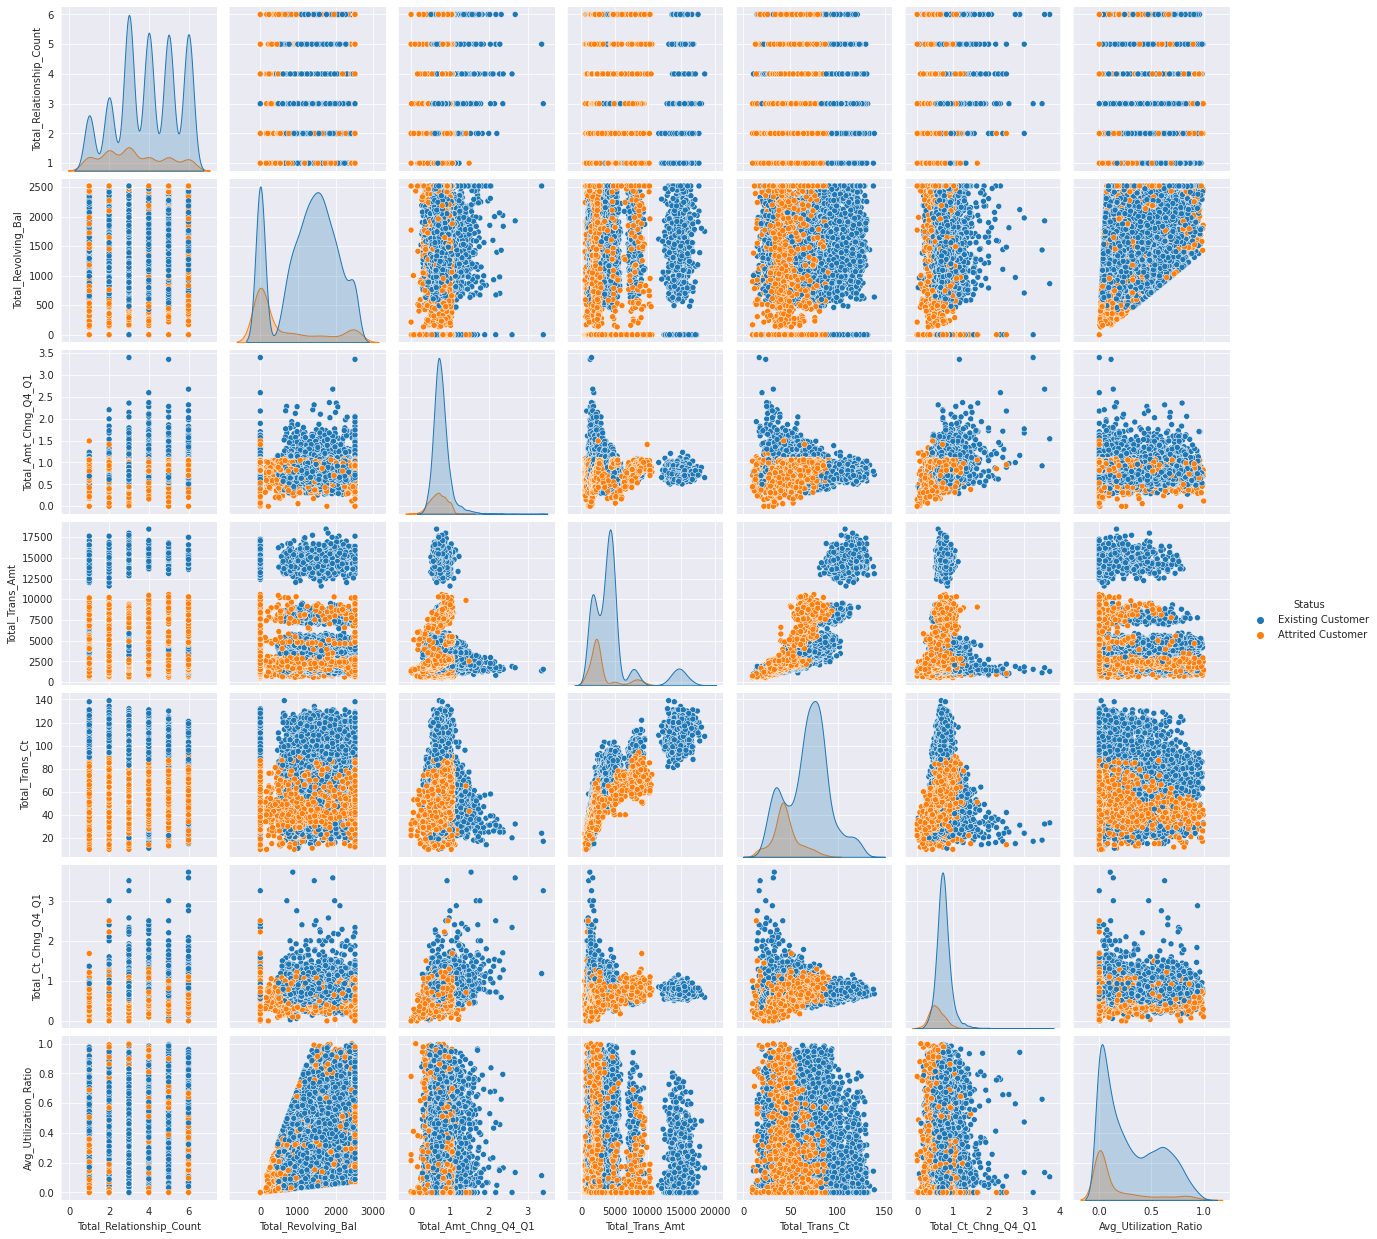

In [42]:
df_totals = df[['Status','Total_Relationship_Count','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
sns.pairplot(df_totals, hue="Status")